In [1]:
import numpy as np

# 创建一个矩阵
A = np.array([[1, 2], [3, 4]])

# 进行 SVD
U, S, Vt = np.linalg.svd(A)

print("U:", U)
print("S:", S)
print("Vt:", Vt)

U: [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S: [5.4649857  0.36596619]
Vt: [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


In [2]:
lam, U = np.linalg.eig(A)  #特征分解
inv = np.linalg.inv(U)  #求逆矩阵
print(A)
print('特征值:', lam)
print('特征向量', U)
print('特征向量的逆', inv)

[[1 2]
 [3 4]]
特征值: [-0.37228132  5.37228132]
特征向量 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
特征向量的逆 [[-0.92305231  0.42222915]
 [-0.57427572 -0.83696501]]


In [3]:
import numpy as np
from scipy.linalg import svd

A = np.array([[1, 2],
              [1, 1],
              [0, 0]])
p, s, q = svd(A, full_matrices=False)
print('P=', p)
print('S=', s)
print('Q=', q)

P= [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]
 [ 0.          0.        ]]
S= [2.61803399 0.38196601]
Q= [[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]


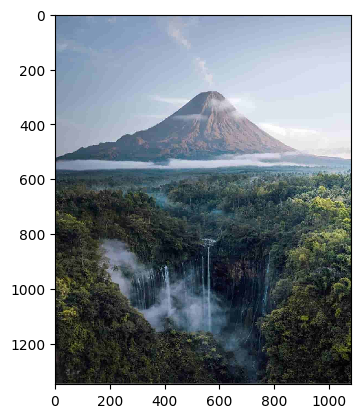

ValueError: expected matrix

In [5]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt


# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p, s)
    temp = np.dot(temp, q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    print(A - temp)


# 加载256色图片
image = Image.open('/Users/pangmengting/Pictures/照片/shan.jpg')
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p, s, q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, 5)
get_image_feature(s, 50)
get_image_feature(s, 500)